In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

In [8]:
dataset = pd.read_csv("attrition_data.csv")

In [9]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
dataset.values[1,21]
dataset =dataset.drop(["Over18"], axis = 1)

In [11]:
dataset.values[1]

array([49, 'No', 'Travel_Frequently', 279, 'Research & Development', 8, 1,
       'Life Sciences', 1, 2, 3, 'Male', 61, 2, 2, 'Research Scientist',
       2, 'Married', 5130, 24907, 1, 'No', 23, 4, 4, 80, 1, 10, 3, 3, 10,
       7, 1, 7], dtype=object)

In [12]:
Y = dataset.iloc[:, 1].values
print(Y)
Y = np.array(Y)
type(Y)
Y.shape

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


(1470,)

In [13]:
# Encoding gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)
print(Y[1])
print(Y[0])

[1 0 1 ... 0 0 0]
0
1


In [14]:
X = dataset.drop(dataset.columns[1], axis =1)
X = X.values

In [15]:
type(X)

numpy.ndarray

In [16]:
print(X[1])

[49 'Travel_Frequently' 279 'Research & Development' 8 1 'Life Sciences' 1
 2 3 'Male' 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4
 4 80 1 10 3 3 10 7 1 7]


In [17]:
# Encoding gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[: ,10] = le.fit_transform(X[:, 10])

In [18]:
print(X[1])

[49 'Travel_Frequently' 279 'Research & Development' 8 1 'Life Sciences' 1
 2 3 1 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80
 1 10 3 3 10 7 1 7]


In [19]:
#One hot encoding business travel column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [20]:
print(X[1])

[0.0 1.0 0.0 49 279 'Research & Development' 8 1 'Life Sciences' 1 2 3 1
 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80 1 10
 3 3 10 7 1 7]


In [21]:
print(X[1,8])

Life Sciences


In [22]:
#One hot encoding education column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [23]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 49 279 'Research & Development' 8 1 1
 2 3 1 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80
 1 10 3 3 10 7 1 7]


In [24]:
print(X[1,11])

Research & Development


In [25]:
#One hot encoding DEPARTMENT column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [11])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [26]:
print(X[1])

[0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2
 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80 1 10 3 3 10
 7 1 7]


In [27]:
print(X[1,23])

Research Scientist


In [28]:
#One hot encoding JobRole column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [23])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [29]:
print(X[1])

[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 'Married' 5130 24907 1 'No' 23 4
 4 80 1 10 3 3 10 7 1 7]


In [30]:
print(X[1,33])

Married


In [31]:
#One hot encoding Marital Status column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [33])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [32]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 5130 24907 1 'No' 23
 4 4 80 1 10 3 3 10 7 1 7]


In [33]:
print(X[1,-13])

No


In [34]:
# Encoding overtime column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[: ,-13] = le.fit_transform(X[:, -13])

In [35]:
print(X[1,-13])

0


In [36]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 5130 24907 1 0 23 4 4
 80 1 10 3 3 10 7 1 7]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2, random_state = 0)

In [50]:
print(X_train[0])

[-0.54065487  1.11547067 -0.69900472 -0.30151134 -0.1948136  -0.4662524
  3.6767538  -0.3323877  -0.23791548 -0.50636968 -0.53013748 -0.2438431
 -0.21724413 -1.38234984  1.53311035 -0.14123725  1.18321596 -0.34332306
 -0.68021068 -0.23186945 -0.31637564 -0.34641016 -0.479714    0.64565275
  2.3389367  -0.48557354  1.45567735  0.08087412  0.          1.53241985
  1.13998967 -1.24094996  0.33865726  0.38547835  1.7590273   1.14972558
  2.41725694 -0.34865414  0.514544    1.62507442 -0.58948704 -0.42092419
  0.26452003  0.          0.22505569  2.30343322 -0.6134953  -1.07224664
 -0.98200785 -1.15684058 -0.67381506 -1.15043886]


In [38]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [39]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [40]:
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
ann.fit(X_train, y_train, batch_size= 32, epochs = 100)

Epoch 1/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8282
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.8401
Epoch 3/100
37/37 [==============================] - 0s 982us/step - loss: 0.4405 - accuracy: 0.8401
Epoch 4/100
37/37 [==============================] - 0s 960us/step - loss: 0.4203 - accuracy: 0.8401
Epoch 5/100
37/37 [==============================] - 0s 778us/step - loss: 0.4042 - accuracy: 0.8401
Epoch 6/100
37/37 [==============================] - 0s 784us/step - loss: 0.3918 - accuracy: 0.8401
Epoch 7/100
37/37 [==============================] - 0s 828us/step - loss: 0.3816 - accuracy: 0.8401
Epoch 8/100
37/37 [==============================] - 0s 806us/step - loss: 0.3727 - accuracy: 0.8401
Epoch 9/100
37/37 [==============================] - 0s 807us/step - loss: 0.3652 - accuracy: 0.8401
Epoch 10/100
37/37 [==============================] - 0s 775us/step - loss: 0.3586 - accuracy: 

In [42]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

10/10 [==============================] - 0s 890us/step


In [43]:
print(" Precision Score:", sklearn.metrics.precision_score(y_test, y_pred))
print(" Recall Score :", sklearn.metrics.recall_score(y_test, y_pred))

 Precision Score: 0.6285714285714286
 Recall Score : 0.4489795918367347


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[232  13]
 [ 27  22]]
0.8639455782312925


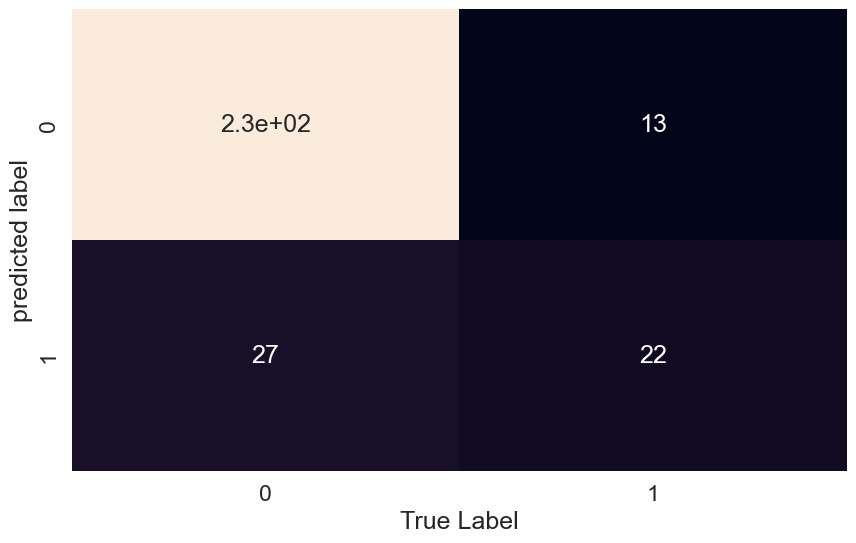

In [45]:
sns.set(font_scale = 1.5)
def plot_confusion_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize = (10,6))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False)
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_confusion_matrix(y_test, y_pred)

***

In [47]:
dataset = pd.read_csv('test_data.csv')
dataset =dataset.drop(["Over18"], axis = 1)

le1 = LabelEncoder()
dataset.iloc[: ,10] = le1.fit_transform(dataset.iloc[:, 10])

ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder= "passthrough")
dataset = np.array(ct1.fit_transform(dataset))

ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder= "passthrough")
dataset = np.array(ct2.fit_transform(dataset))

ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [11])], remainder= "passthrough")
dataset = np.array(ct3.fit_transform(dataset))

ct4 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [23])], remainder= "passthrough")
dataset = np.array(ct4.fit_transform(dataset))

ct5 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [33])], remainder= "passthrough")
dataset = np.array(ct5.fit_transform(dataset))

le2 = LabelEncoder()
dataset[: ,-13] = le2.fit_transform(dataset[:, -13])

C:\Users\K S Ramalakshmi\AppData\Local\Temp\ipykernel_16720\3352482001.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[: ,10] = le1.fit_transform(dataset.iloc[:, 10])


In [49]:
print(dataset[0])
dataset = StandardScaler().fit_transform(dataset)

[1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 41 1102 'Sales' 1 2
 'Life Sciences' 1 2 94 3 2 'Sales Executive' 4 'Single' 5993 2 8 'Yes' 3
 1 80 0 8 0 6 4 0 5]


ValueError: could not convert string to float: 'Sales'